In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image,ImageDraw
import cmath

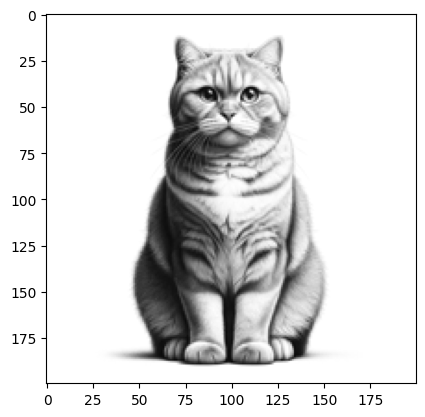

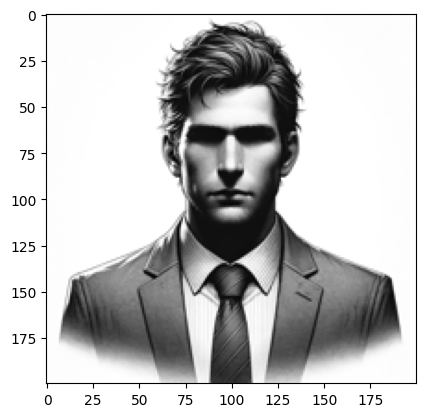

In [39]:
Cat_image = Image.open("images/cat.jpg").convert("L")
Man_image = Image.open("images/man.jpg").convert("L")


Cat_image = Cat_image.resize((200,200))
Man_image = Man_image.resize((200,200))

f1 = np.asarray(Cat_image)
f2 = np.asarray(Man_image)
M1, N1 = np.shape(f1) # (img x, img y)
M2, N2 = np.shape(f2) # (img x, img y)
plt.imshow(f1, cmap='gray')
plt.show()
plt.imshow(f2, cmap='gray')
plt.show()

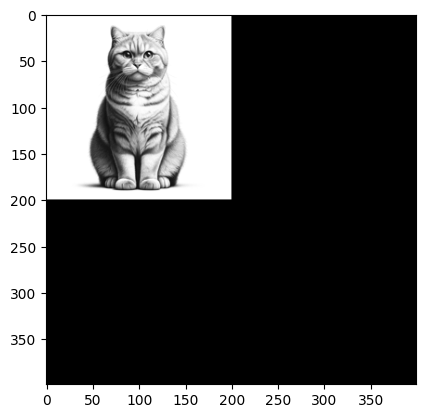

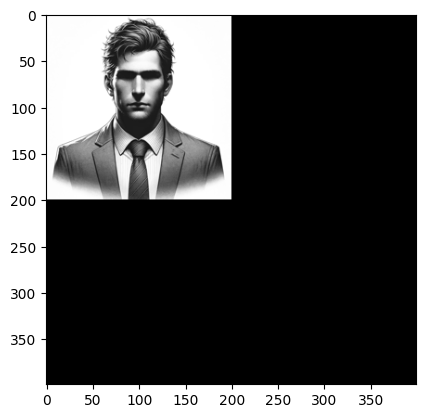

In [40]:
P1,Q1 = M1*2-1,N1*2-1
shape1 = np.shape(f1)
#our padded array
fp1 = np.zeros((P1, Q1))
#import our image into padded array
fp1[:shape1[0],:shape1[1]] = f1
plt.imshow(fp1, cmap='gray',vmin=0, vmax=255)
plt.show()
#####second image
P2,Q2 = M2*2-1,N2*2-1
shape2 = np.shape(f2)
#our padded array
fp2 = np.zeros((P2, Q2))
#import our image into padded array
fp2[:shape2[0],:shape2[1]] = f2
plt.imshow(fp2, cmap='gray',vmin=0, vmax=255)
plt.show()

In [41]:
def centerize(img):
    P,Q = img.shape
    center = np.zeros((P,Q))
    for x in range(P):
        for y in range(Q):
            center[x,y]=img[x,y]*np.power(-1,x+y)
    return center

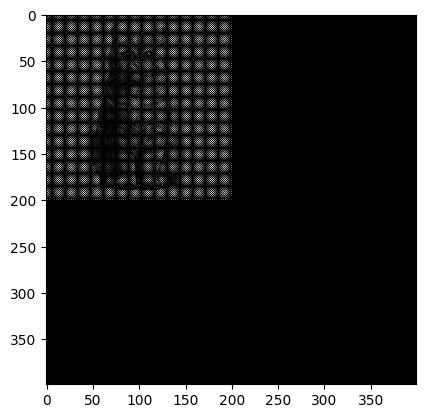

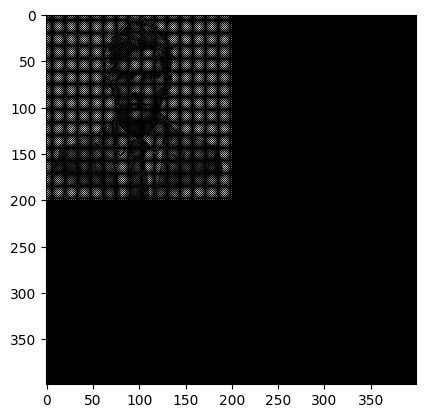

In [42]:
fpc1 = np.zeros((P1, Q1))
for x in range(P1):
    for y in range(Q1):
        fpc1[x,y]=fp1[x,y]*np.power(-1,x+y)
plt.imshow(fpc1, cmap='gray',vmin=0, vmax=255)
plt.show()
###second image
fpc2 = np.zeros((P2, Q2))
for x in range(P2):
    for y in range(Q2):
        fpc2[x,y]=fp2[x,y]*np.power(-1,x+y)

plt.imshow(fpc2, cmap='gray',vmin=0, vmax=255)
plt.show()

# Fourier Transform

In [43]:
def DFT2D(padded):
     M,N = np.shape(padded)
     dft2d = np.zeros((M,N),dtype=complex)
     for k in range(M):
         for l in range(N):
             sum_matrix = 0.0
             for m in range(M):
                 for n in range(N):
                     e = cmath.exp(- 2j * np.pi * (float(k * m) / M + float(l * n) / N))
                     sum_matrix +=  padded[m,n] * e
             dft2d[k,l] = sum_matrix
     return dft2d

In [44]:
# dft2d = DFT2D(fpc)
# plt.imshow(dft2d.real, cmap='gray')
# plt.show()

In [45]:
def DFT(arry):
    U = len(arry)
    outarry = np.zeros(U,dtype=complex)
    for m in range(U):
        sum_ = 0.0
        for n in range(U):
            e = np.exp(-1j * 2 * np.pi * m * n / U)
            sum_ += arry[n]*e
        outarry[m] = sum_
    return outarry

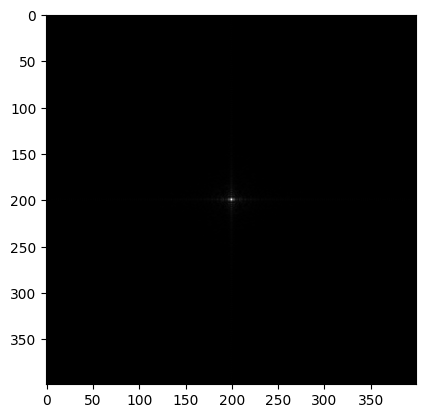

In [46]:
dft = dft1 = np.zeros((P1,Q1),dtype=complex)
#dft for columns
for i in range(P1):
    dft[i] = DFT(fpc1[i])
#dft for rows
for j in range(Q1):
    dft1[:,j] = DFT(dft[:,j])

maginitude_cat = np.abs(dft1)
plt.imshow(maginitude_cat, cmap='gray')

### second image

dft = dft2 = np.zeros((P2,Q2),dtype=complex)
#dft for columns
for i in range(P2):
    dft[i] = DFT(fpc2[i])
#dft for rows
for j in range(Q2):
    dft2[:,j] = DFT(dft[:,j])

maginitude_man = np.abs(dft2)
plt.imshow(maginitude_man, cmap='gray')

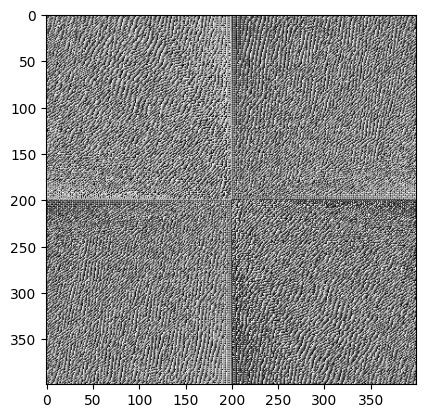

In [47]:
# Compute the phase of the Fourier transform
phase_cat = np.angle(dft1)
plt.imshow(phase_cat, cmap='gray')

# Compute the phase of the Fourier transform
phase_man = np.angle(dft2)
plt.imshow(phase_man, cmap='gray')

# inverse DFT

In [48]:
#inverse DFT for complex number
def IDFT(arry):
    U = len(arry)
    outarry = np.zeros(U,dtype=complex)
    for n in range(U):
        sum_ = 0.0
        for m in range(U):
            e = np.exp(1j * 2 * np.pi * m * n / U)
            sum_ += arry[m]*e
        pixel = sum_/U
        outarry[n]=pixel
    return outarry

In [49]:
#inverse DFT complex to real
def IDFTR(arry):
    U = len(arry)
    outarry = np.zeros(U)
    for n in range(U):
        sum_ = 0.0
        for m in range(U):
            e = np.exp(1j * 2 * np.pi * m * n / U)
            sum_ += arry[m]*e
        pixel = sum_.real/U
        outarry[n]=pixel
    return outarry

In [50]:
man_cat_comb = np.multiply(maginitude_cat, np.exp(1j * phase_man))

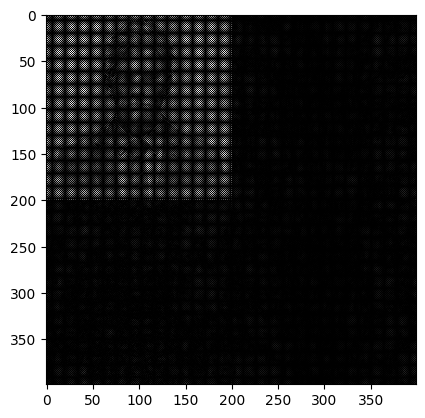

In [51]:
#Process Inverse DFT
idft = np.zeros((P1,Q1),dtype=complex)
idft1 = np.zeros((P1,Q1))
#Inverse for columns
for i in range(P1):
    idft[i]=IDFT(man_cat_comb[i])
#Inverse for rows
for j in range(Q1):
    idft1[:,j] = IDFTR(idft[:,j])

plt.imshow(idft1.real, cmap='gray',vmin=0, vmax=255)
plt.show()

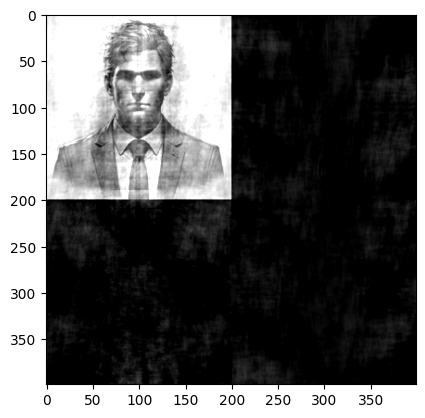

In [52]:
gp = centerize(idft1)
plt.imshow(gp,cmap="gray",vmin=0, vmax=255)
plt.show()

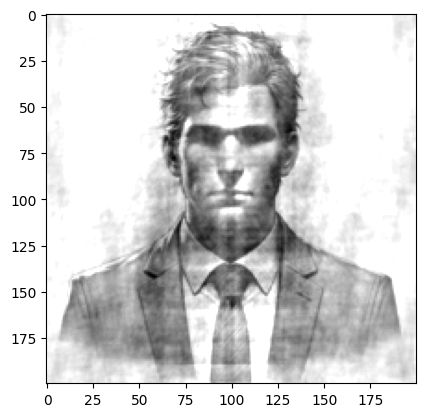

In [53]:
org_img=gp[:shape1[0],:shape1[1]]
plt.imshow(org_img,cmap='gray',vmin=0, vmax=255)
plt.show()

In [54]:
man_cat_comb2 = np.multiply(maginitude_man, np.exp(1j * phase_cat))

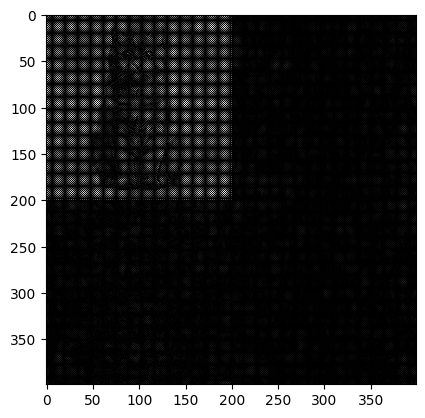

In [55]:
#Process Inverse DFT
idft = np.zeros((P1,Q1),dtype=complex)
idft1 = np.zeros((P1,Q1))
#Inverse for columns
for i in range(P1):
    idft[i]=IDFT(man_cat_comb2[i])
#Inverse for rows
for j in range(Q1):
    idft1[:,j] = IDFTR(idft[:,j])

plt.imshow(idft1.real, cmap='gray',vmin=0, vmax=255)
plt.show()

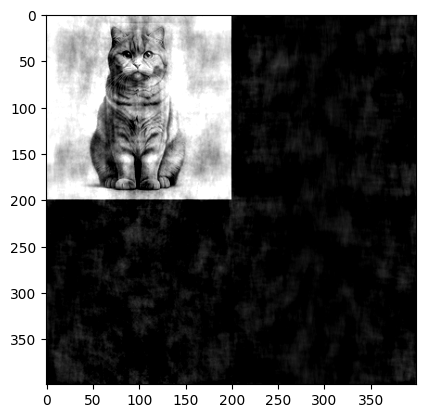

In [56]:
gp = centerize(idft1)
plt.imshow(gp,cmap="gray",vmin=0, vmax=255)
plt.show()

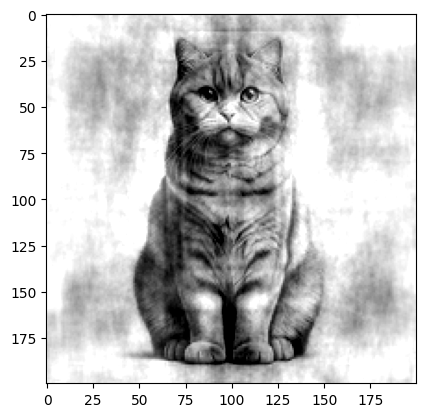

In [57]:
org_img=gp[:shape1[0],:shape1[1]]
plt.imshow(org_img,cmap='gray',vmin=0, vmax=255)
plt.show()